In [73]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd
from utils import write_cache, read_cache, get_factor_info, sample
from datasets import NoSplit, RatioSplit, CrossValidation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
cache_path = "D:/OneDrive - Singapore Management University/cache/netflix_data_small.pickle"
X, factor_info = read_cache(cache_path)

_, _, X = sample(X, axis=0, n_samples=1000, seed=3080)
display(X.shape)

_, _, X = sample(X, axis=1, n_samples=500, seed=4060)
display(X.shape)

[I] Sampling to size 1000
[I]   Sampling seed    : 3080


(1000, 3362)

[I] Sampling to size 500
[I]   Sampling seed    : 4060


(1000, 500)

In [75]:
X_split = NoSplit(X=X)
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


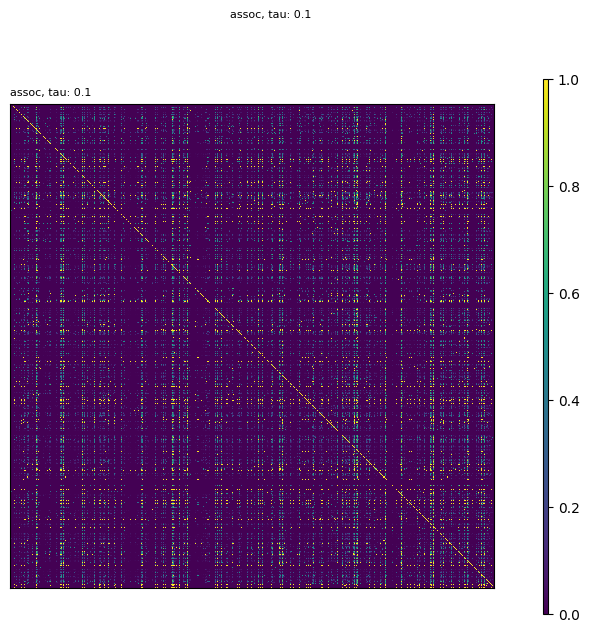

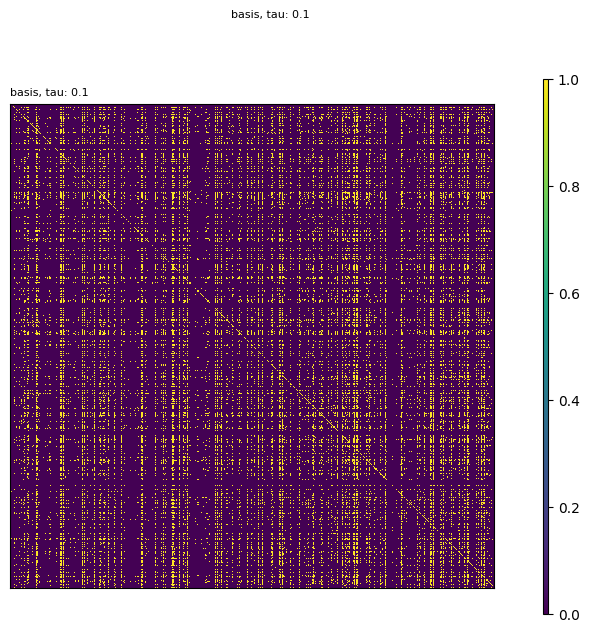

[I] k            : 5
[I] tau          : 0.15
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


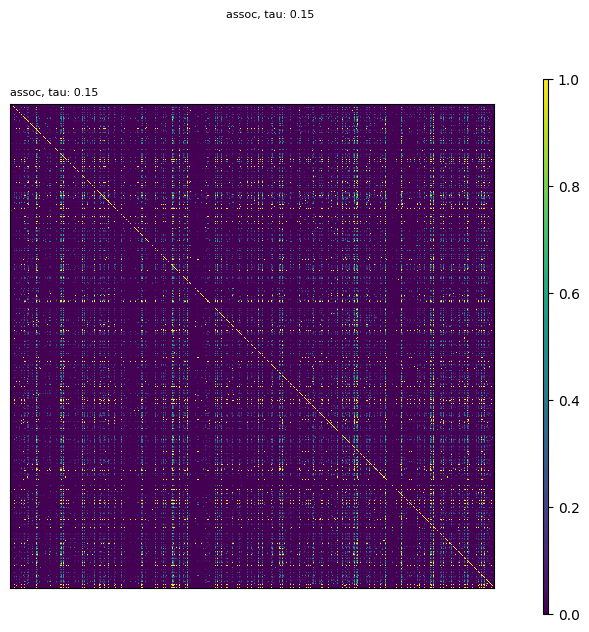

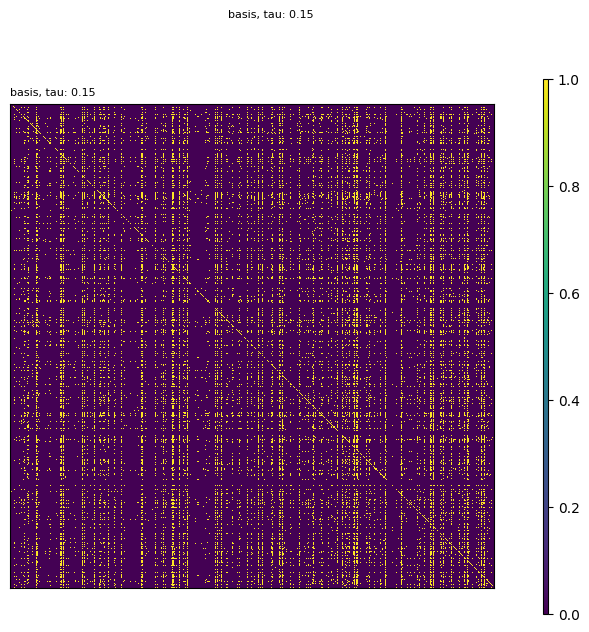

[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


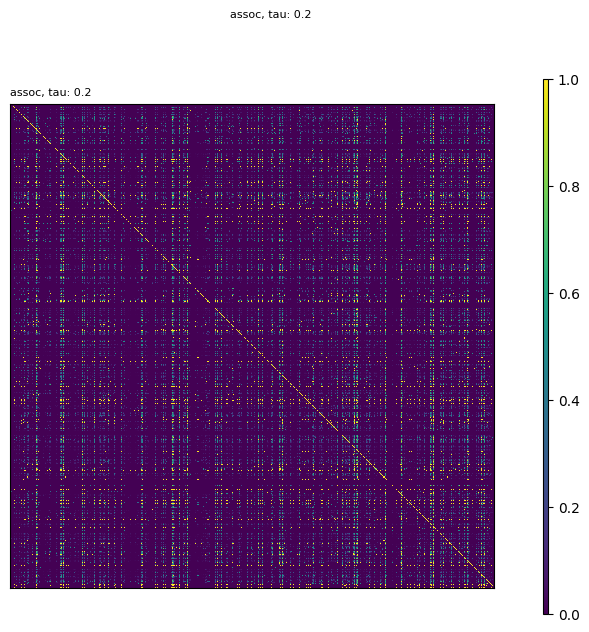

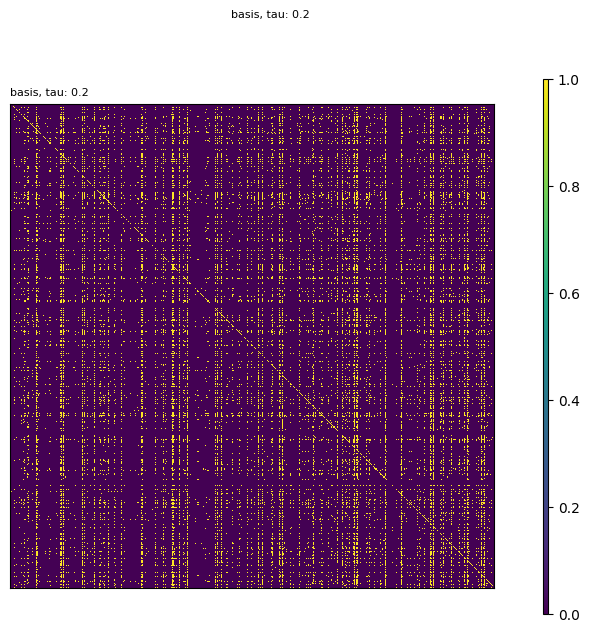

[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


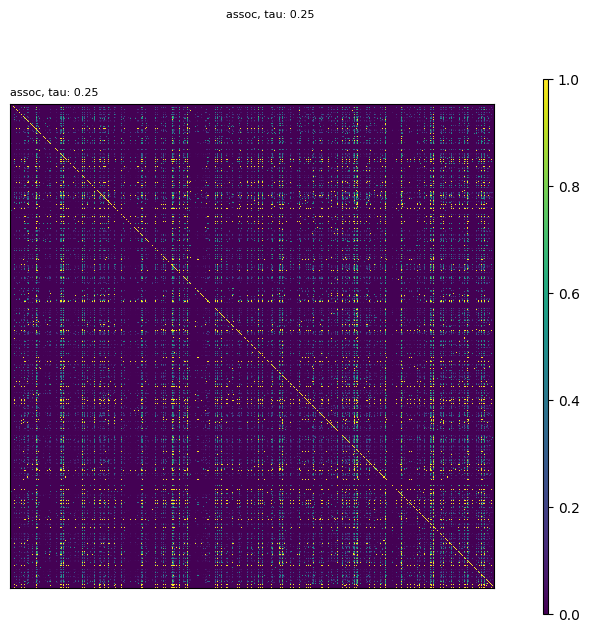

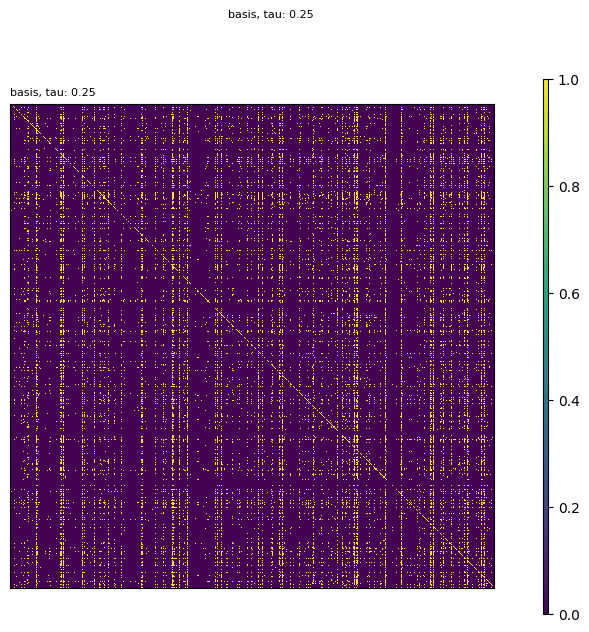

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


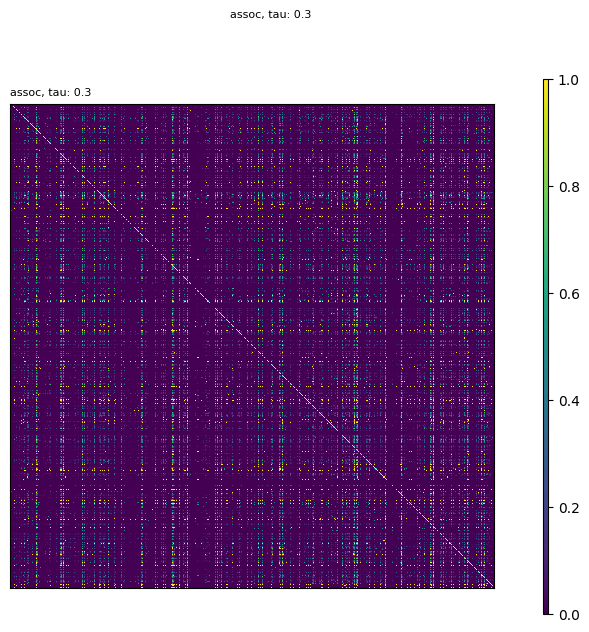

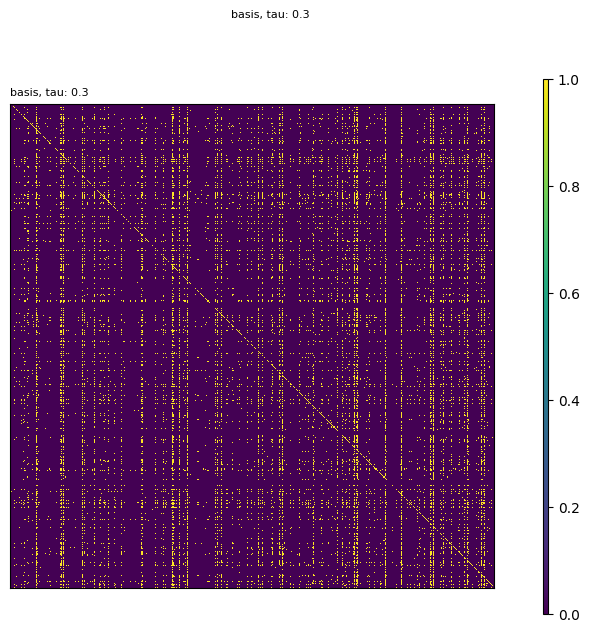

[I] k            : 5
[I] tau          : 0.35
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


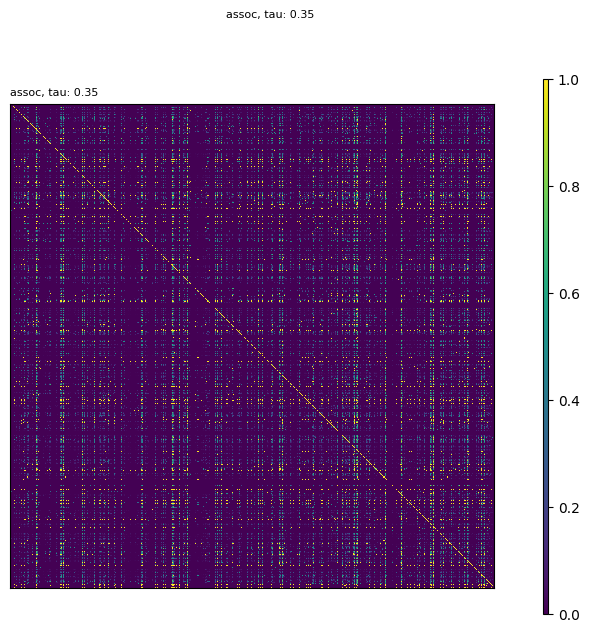

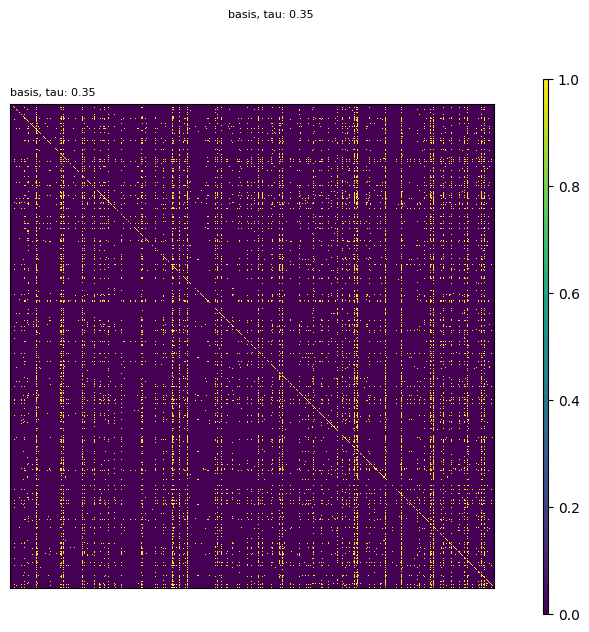

[I] k            : 5
[I] tau          : 0.4
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


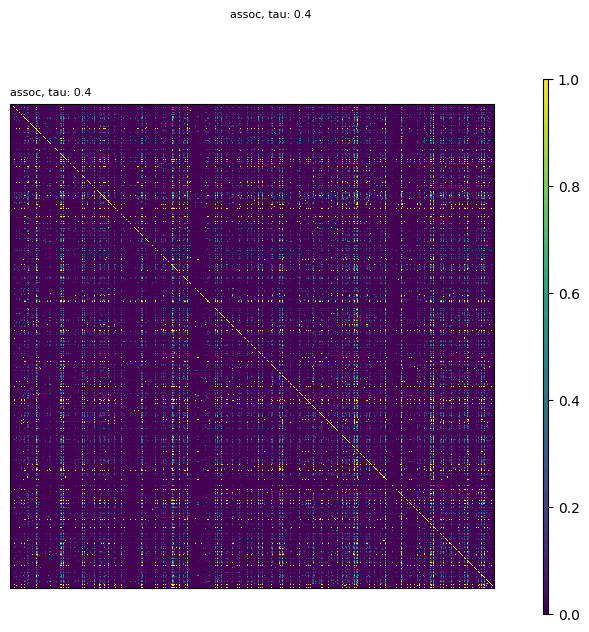

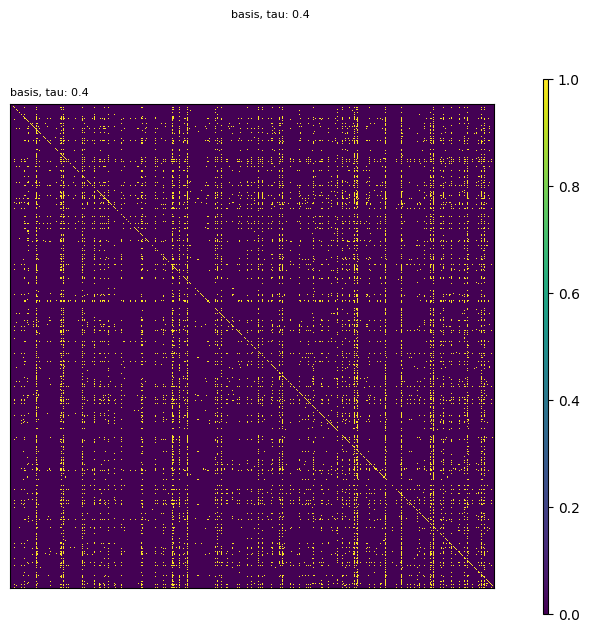

[I] k            : 5
[I] tau          : 0.45
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


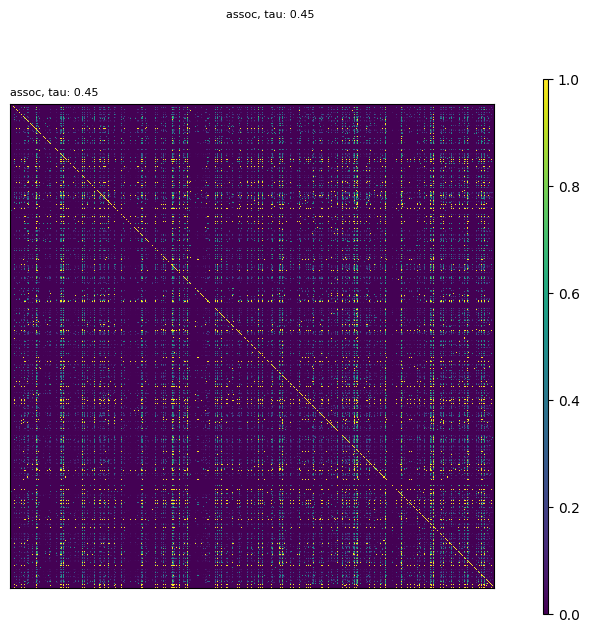

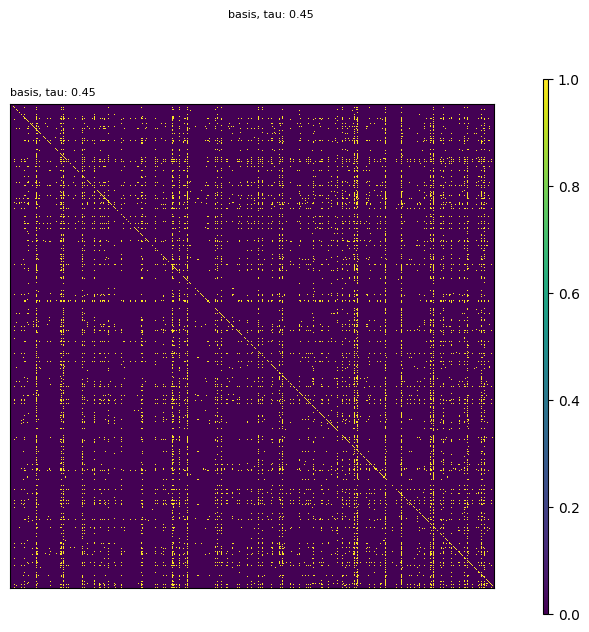

[I] k            : 5
[I] tau          : 0.5
[I] weights      : [0.5, 0.5]
[I] display      : True
[W] Missing validation data.


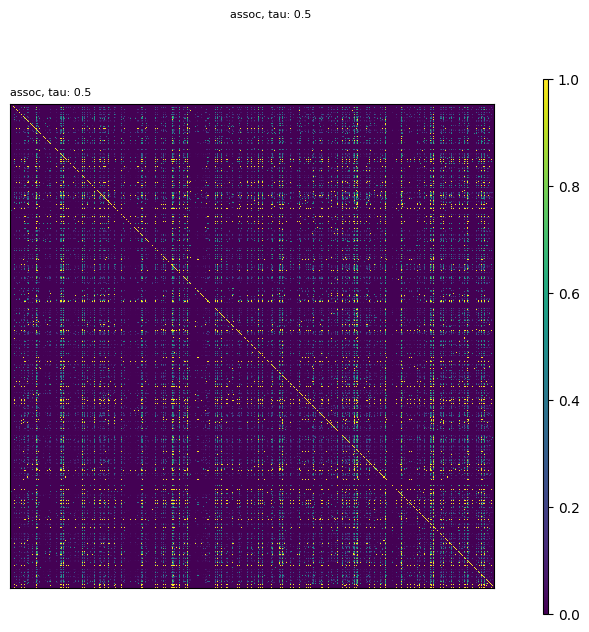

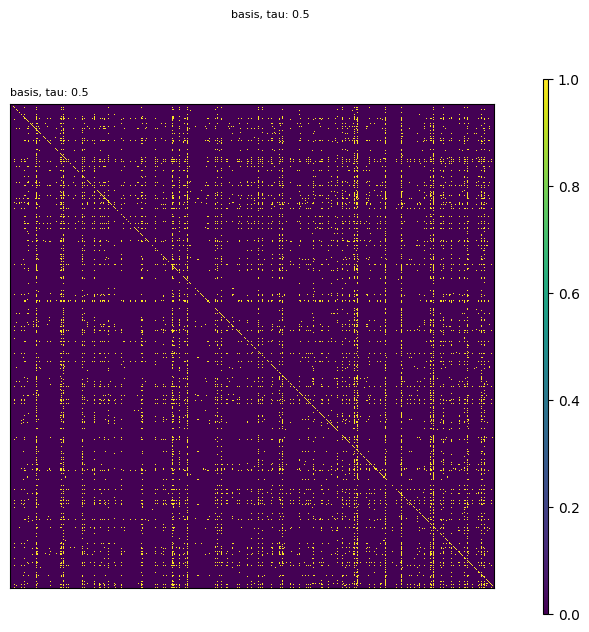

In [76]:
k = 5
tau_list = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
w = [0.5, 0.5]

for tau in tau_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso._fit_prepare(X_train, display=True) # plot assoc and basis

In [77]:
# grid search over w
k = 5
tau = 0.25
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
from utils import add_log

metrics = ['Recall', 'Precision', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_reconstruction = pd.DataFrame(columns=columns)

[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.4, 0.6]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:23<00:00,  4.67s/it]                         


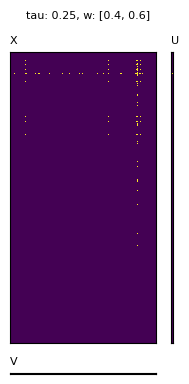

[I] task         : reconstruction
[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.5, 0.5]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:22<00:00,  4.43s/it]                         


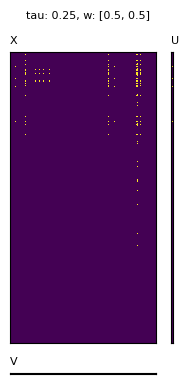

[I] task         : reconstruction
[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.6, 0.4]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:22<00:00,  4.46s/it]                         


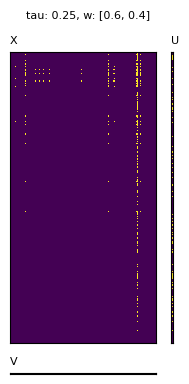

[I] task         : reconstruction
[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.7, 0.3]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:22<00:00,  4.52s/it]                         


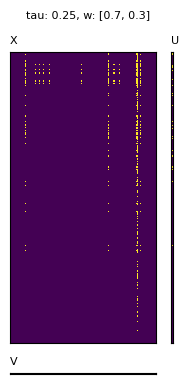

[I] task         : reconstruction
[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.8, 0.2]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:24<00:00,  4.82s/it]                         


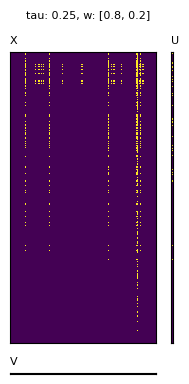

[I] task         : reconstruction
[I] k            : 5
[I] tau          : 0.25
[I] weights      : [0.9, 0.1]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:25<00:00,  5.15s/it]                         


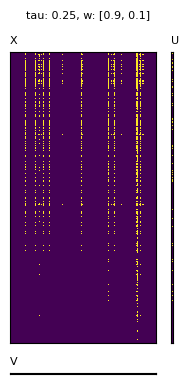

[I] task         : reconstruction


In [78]:
for w in w_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso.fit(X_train, display=True, scaling=0.3)

    results = asso.eval(X_test, metrics=metrics, task='reconstruction')
    add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

In [79]:
display(df_reconstruction)

,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1
0,2023-12-08 18:20:15.616337,5,0.25,0.4,0.6,0.193828,0.777591,0.012340,0.987660,0.310306
1,2023-12-08 18:20:38.452485,5,0.25,0.5,0.5,0.248010,0.704482,0.012260,0.987740,0.366866
2,2023-12-08 18:21:01.261297,5,0.25,0.6,0.4,0.390029,0.569535,0.012958,0.987042,0.462992
3,2023-12-08 18:21:24.372571,5,0.25,0.7,0.3,0.498534,0.476636,0.015022,0.984978,0.487339
4,2023-12-08 18:21:48.981347,5,0.25,0.8,0.2,0.585672,0.397988,0.018622,0.981378,0.473925
5,2023-12-08 18:22:15.284927,5,0.25,0.9,0.1,0.738305,0.246733,0.036030,0.963970,0.369863


In [80]:
# grid search over k

k = 40
tau = 0.15
w = [0.7, 0.3]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='reconstruction')

display(asso.df_validation)

[I] k            : 40
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[I] task         : reconstruction


100%|██████████| 40/40 [03:13<00:00,  4.84s/it]                        


,time,k,tau,p_pos,p_neg,Recall,Precision,Accuracy,F1
0,2023-12-08 18:22:20.688411,1,0.15,0.7,0.3,0.292697,0.496212,0.985614,0.368204
1,2023-12-08 18:22:25.346861,2,0.15,0.7,0.3,0.378997,0.488481,0.985422,0.426830
2,2023-12-08 18:22:30.371887,3,0.15,0.7,0.3,0.420891,0.489763,0.985426,0.452722
3,2023-12-08 18:22:35.434430,4,0.15,0.7,0.3,0.447005,0.491705,0.985462,0.468291
4,2023-12-08 18:22:40.607384,5,0.15,0.7,0.3,0.463622,0.492143,0.985466,0.477457
5,2023-12-08 18:22:45.951505,6,0.15,0.7,0.3,0.482893,0.489940,0.985394,0.486391
6,2023-12-08 18:22:51.093519,7,0.15,0.7,0.3,0.494903,0.491676,0.985438,0.493284
7,2023-12-08 18:22:55.939448,8,0.15,0.7,0.3,0.505795,0.491785,0.985436,0.498692
8,2023-12-08 18:23:00.990444,9,0.15,0.7,0.3,0.523949,0.486767,0.985270,0.504674
9,2023-12-08 18:23:06.303283,10,0.15,0.7,0.3,0.532328,0.487094,0.985274,0.508708


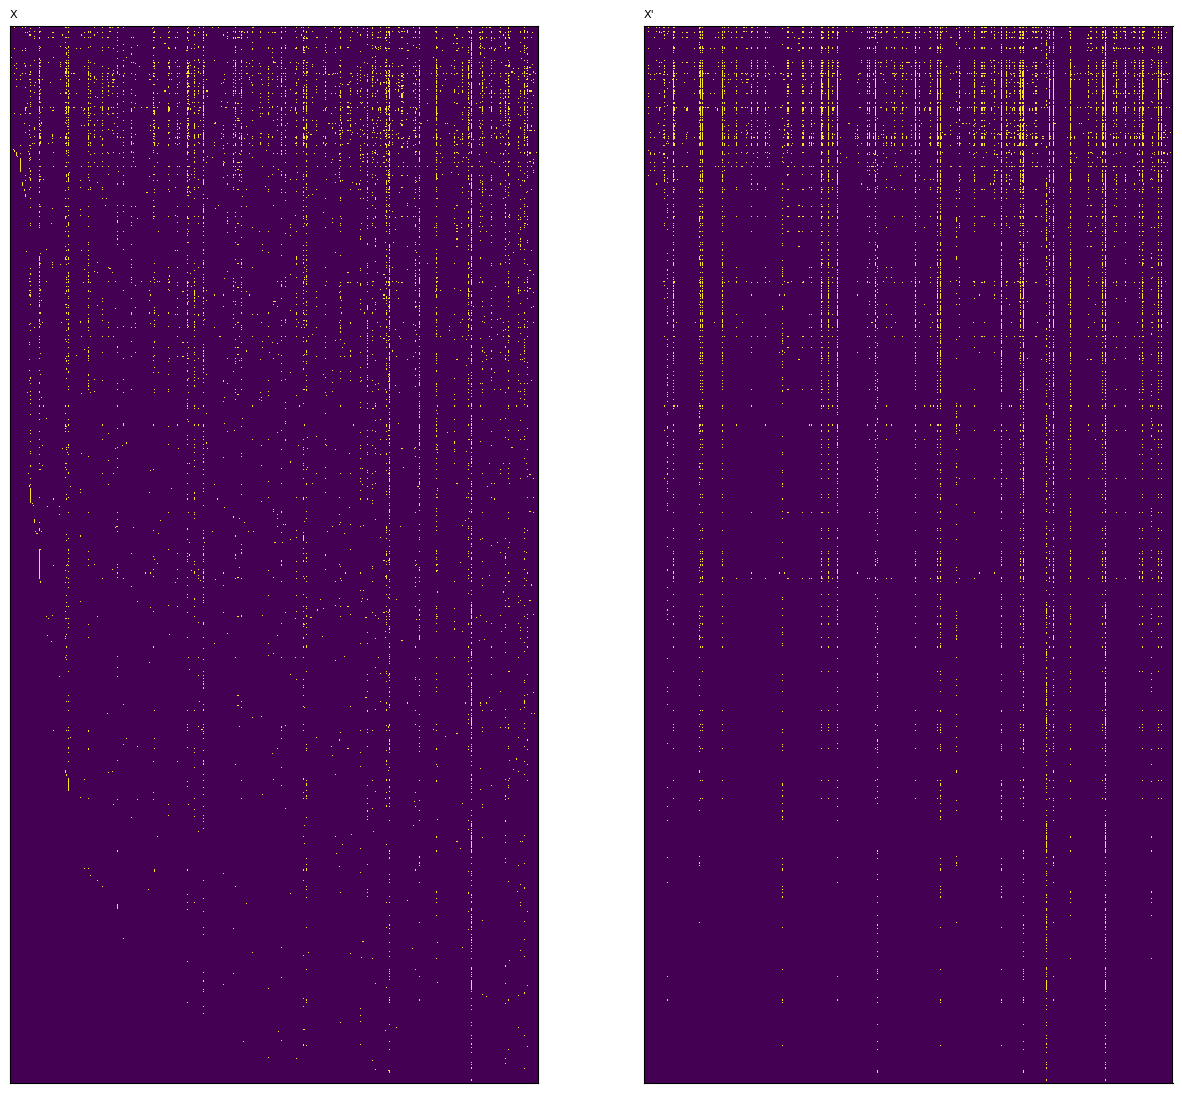

In [81]:
from utils import show_matrix, to_dense, matmul

show_matrix(settings=[(to_dense(X), [0, 0], 'X'), (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")])

<Axes: >

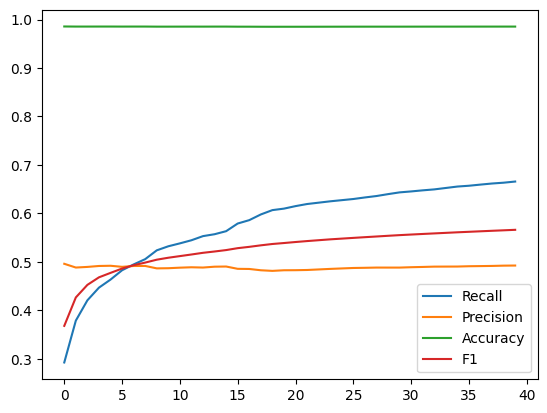

In [82]:
asso.df_validation[['Recall', 'Precision', 'Accuracy', 'F1']].plot()

In [83]:
# grid search over k

k = 200
tau = 0.15
w = [0.7, 0.3]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='reconstruction')

display(asso.df_validation)

[I] k            : 200
[I] tau          : 0.15
[I] weights      : [0.7, 0.3]
[I] task         : reconstruction


 55%|█████▍    | 109/200 [07:59<06:40,  4.40s/it]                       

[W] Stopped in advance: coverage stops improving.


,time,k,tau,p_pos,p_neg,Recall,Precision,Accuracy,F1
0,2023-12-08 18:25:35.146048,1,0.15,0.7,0.3,0.292697,0.496212,0.985614,0.368204
1,2023-12-08 18:25:40.010904,2,0.15,0.7,0.3,0.378997,0.488481,0.985422,0.426830
2,2023-12-08 18:25:44.786422,3,0.15,0.7,0.3,0.420891,0.489763,0.985426,0.452722
3,2023-12-08 18:25:49.471039,4,0.15,0.7,0.3,0.447005,0.491705,0.985462,0.468291
4,2023-12-08 18:25:54.529936,5,0.15,0.7,0.3,0.463622,0.492143,0.985466,0.477457
...,...,...,...,...,...,...,...,...,...
104,2023-12-08 18:33:11.562833,105,0.15,0.7,0.3,0.747521,0.492955,0.985372,0.594118
105,2023-12-08 18:33:15.412963,106,0.15,0.7,0.3,0.747661,0.492911,0.985370,0.594130
106,2023-12-08 18:33:19.109520,107,0.15,0.7,0.3,0.748220,0.492690,0.985360,0.594145
107,2023-12-08 18:33:22.905080,108,0.15,0.7,0.3,0.748359,0.492646,0.985358,0.594157


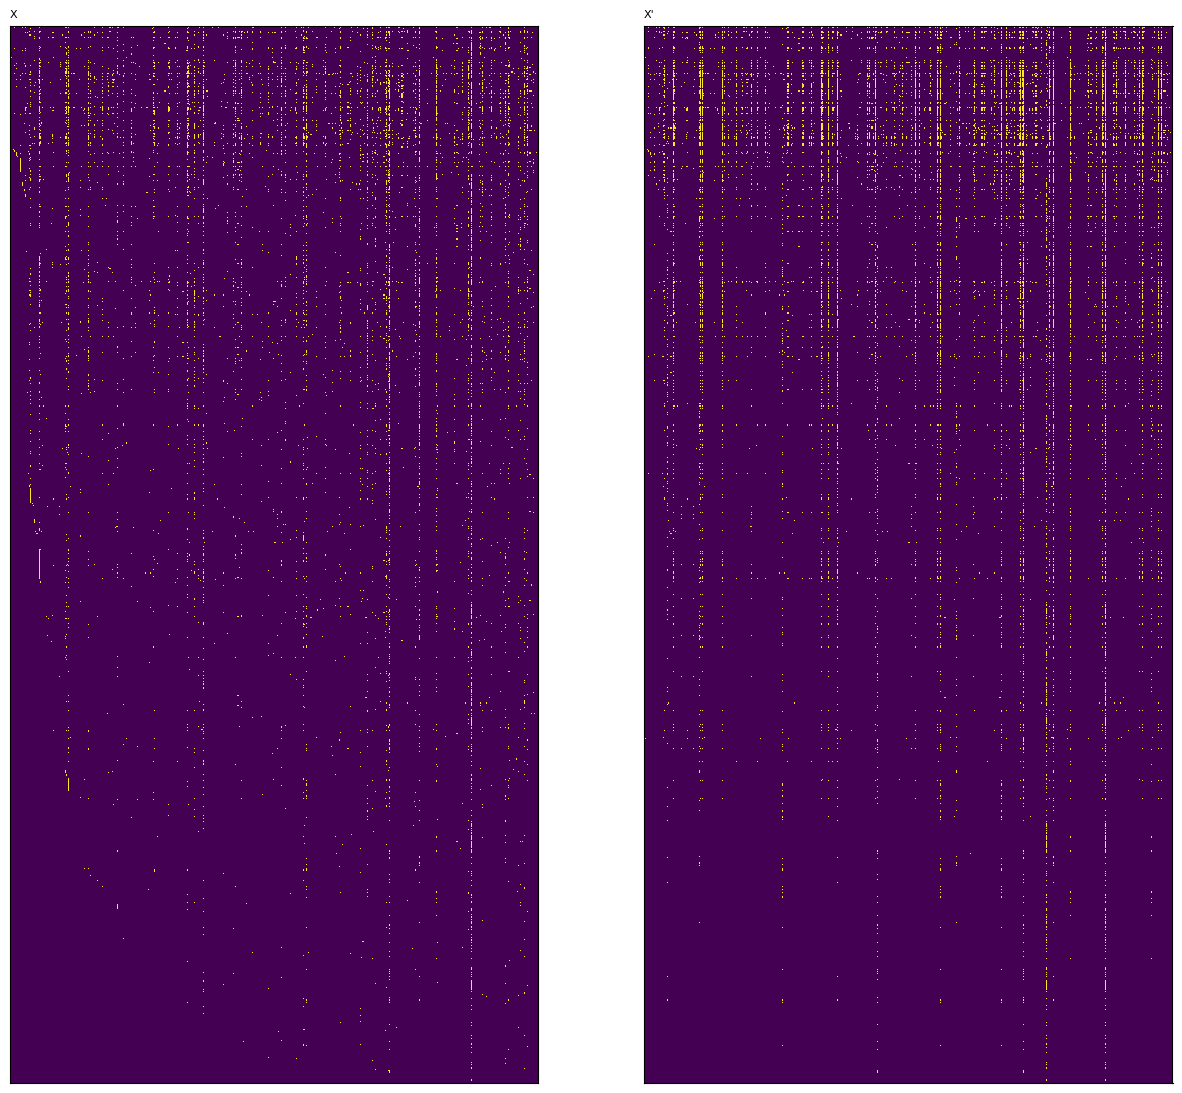

In [84]:
from utils import show_matrix, to_dense, matmul

show_matrix(settings=[(to_dense(X), [0, 0], 'X'), (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")])

<Axes: >

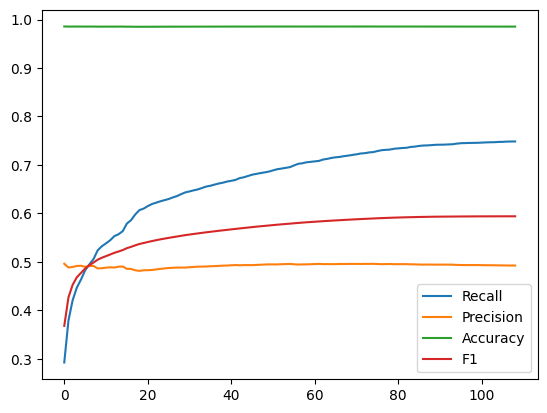

In [85]:
asso.df_validation[['Recall', 'Precision', 'Accuracy', 'F1']].plot()